In [43]:
# 预处理评论
import os
datas=os.listdir('./需求挖掘过程')
data=[]
for each in datas:
    if each.startswith('京东评论'):
        with open('./需求挖掘过程/'+each,'r',encoding='utf-8') as f:
            data.extend(f.readlines())

with open('./需求挖掘过程/A所有.txt','w',encoding='utf-8') as f:
    f.writelines(data)

# 预处理数据集
import re
data = open('.\需求挖掘过程\A所有.txt', 'r', encoding='utf-8').readlines()
print('原始数据集', len(data), '条')
data = list(set(data))
for i in range(len(data)):
    # 删除空格
    data[i] = re.sub(r'\s+', '', data[i])
    # 删除特殊字符串
    data[i] = re.sub(r'[@#￥%……&*（）《》<>「」{}【】/\\]', ' ', data[i])
    # 删除数字
    data[i] = re.sub(r'\d+', '', data[i])
    # 删除英文
    data[i] = re.sub(r'[a-zA-Z]+', '', data[i])
    # 删除标点符号
    data[i] = re.sub(r'[，。！？、~;：;；“”‘’,.!?]', ' ', data[i])
    # 删除空行
    data[i] = data[i].strip()
    # 删除长度少于10的
    if len(data[i]) < 5:
        data[i] = ''
print('预处理后数据集', len(data), '条')
with open('.\需求挖掘过程\B所有_预处理后.txt', 'w', encoding='utf-8') as f:
    for each in data:
        f.write(each + '\n') if each != '' else None

0
原始数据集 0 条
预处理后数据集 0 条


In [4]:
# 进行分词
import jieba.posseg as pseg
import jieba
stopwords = open('D:\python_common\基本语料库\停用词表原版.txt', 'r', encoding='utf-8').readlines()
data=open("D:\python_common\基本语料库\搜狗服装停用词.txt",'r',encoding='utf-8').readlines()
stopwords.extend(data)
userdict = open('D:\python_common\基本语料库\搜狗服装保留词.txt', 'r', encoding='utf-8').readlines()
jieba.load_userdict(userdict)
data = open('.\需求挖掘过程\B所有_预处理后.txt', 'r', encoding='utf-8').readlines()
for i in range(len(data)):
    data[i] = data[i].strip()
    data[i] = pseg.cut(data[i])
    data[i] = [each.word+','+each.flag for each in data[i]]
with open('.\需求挖掘过程\CZ所有_分词后的词性.txt', 'w', encoding='utf-8') as f2:
    with open('.\需求挖掘过程\CZ所有_分词后.txt', 'w', encoding='utf-8') as f:
        for each in data:
            for each_word in each:
                w,w2=each_word.split(',')
                if w+'\n' not in stopwords and w != ' ' and len(w) == 2:
                # if w+'\n' not in stopwords
                    f.write(w + ' ')
                    f2.write(w2 + ' ')
            f.write('\n')
            f2.write('\n')

C:\Users\93461\AppData\Local\Temp\ipykernel_56048\1642775870.py:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  back_coloring = imread('词云图背景.jpg')


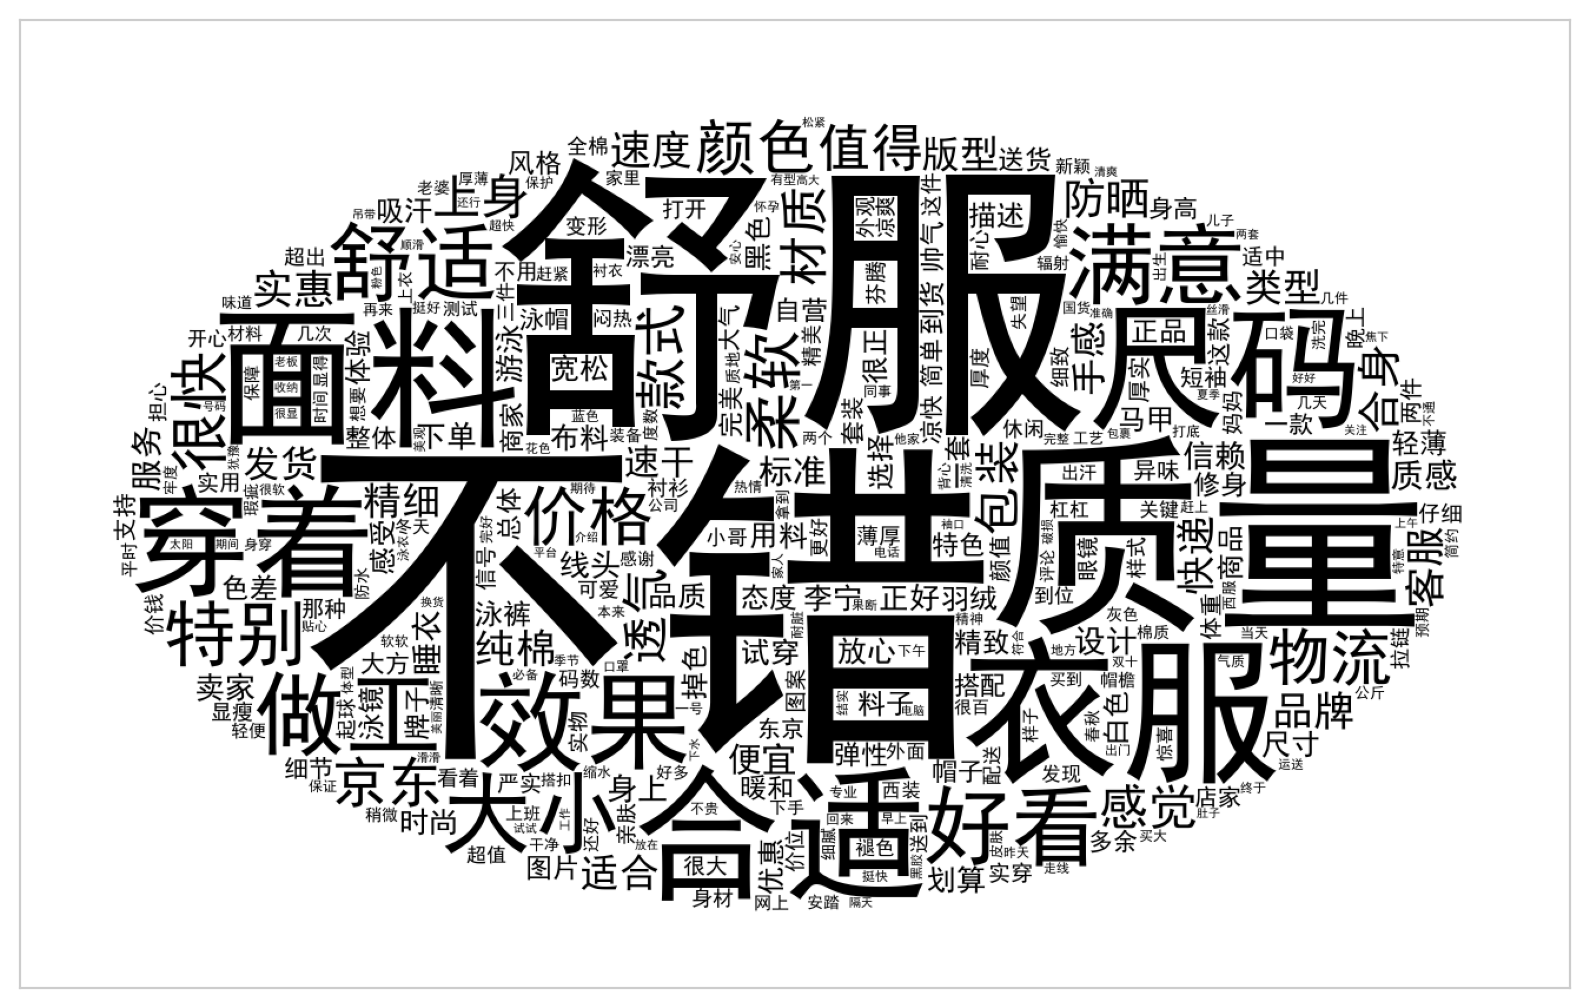

In [5]:
# 词频统计和画词云图
from collections import Counter
# with open('.\需求挖掘过程\C所有_分词后.txt', 'r', encoding='utf-8') as f:
#     data = f.readlines()
# data = [each.strip().split(',')[0] for each in data]
# data2=[]
# [data2.extend(each.split(' ')) for each in data]
# with open('.\需求挖掘过程\D所有_词频统计.txt', 'w', encoding='utf-8') as f:
#     for each in data2:
#         f.write(each + ' ')

with open('.\需求挖掘过程\D所有_词频统计.txt', 'r', encoding='utf-8') as f:
    data2 = f.read().split(' ')
data = Counter(data2)
data = data.most_common()

# 词云
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from imageio import imread

back_coloring = imread('词云图背景.jpg')
image_colors_default = ImageColorGenerator(back_coloring)

wc = WordCloud(width=1000,
               height=800,
               max_font_size=300,
               min_font_size=10,
               max_words=500,
               font_path='C:\Windows\Fonts\simhei.ttf',
               prefer_horizontal=0.9,
               mask=back_coloring,
               background_color='white',
               # color_func=image_colors_default,
               color_func=lambda *args, **kwargs: (0, 0, 0),

               )

wc.generate_from_frequencies(dict(data))
plt.figure(figsize=(10, 8),dpi=200)
# 去除坐标轴的标签
plt.xticks([])
plt.yticks([])
plt.imshow(wc)

In [37]:
# 词共现分析，获取短评论

with open('.\需求挖掘过程\C所有_分词后.txt', 'r', encoding='utf-8') as f:
    data = f.readlines()

with open('.\需求挖掘过程\D所有_分词后_短评分词.txt', 'w', encoding='utf-8') as f:
    for each in data:
        if len(each.split(' ')) <=6:
            f.write(each)

In [55]:

#生成pajek格式
import time

with open('.\需求挖掘过程\D所有_分词后_短评分词.txt', 'r', encoding='utf-8') as f:
    data = f.readlines()

data = [each.strip().split(' ') for each in data]
data3=[]
for each in data:
    # print('\r'+str(data.index(each)/len(data))[0:5],end='',flush=True)
    for i in range(len(each)):
        for j in range(i+1,len(each)):
            if each[i] +'/'+ each[j]:
                data3.append(each[i] +'/'+ each[j])
# print(len(data3))
# pd.DataFrame(data3).to_excel('.\需求挖掘过程\E表词共现计算excel.xls',index=False,header=False)

# keyword_path = r'.\需求挖掘过程\E表词共现计算excel.xls'
keyword_path = data3
word_num=80
output_path = r'.\需求挖掘过程\F词共现结果_'+str(word_num)+'.txt'
app_times=50000

def log(func):
    def wrapper(*args, **kwargs):
        now_time = str(time.strftime('%Y-%m-%d %X', time.localtime()))
        print('------------------------------------------------')
        print('%s func [%s] called' % (now_time, func.__name__))
        print('%s returns:' % func.__name__)
        re = func(*args, **kwargs)
        return re
    return wrapper

def readxls(path):
    import xlrd
    xl = xlrd.open_workbook(path)
    sheet = xl.sheets()[0]
    data = []
    for i in range(0, sheet.ncols):
        data.append(list(sheet.col_values(i)))
    return (data[0])

def readxls2(data):
    print('总共现次数',len(data))
    return (data[0:app_times])

@log
def get_set_key(data, threshold=10):
    all_key = '/'.join(data)
    key_list = [it.strip() for it in all_key.strip().split('/')]
    keys = set(key_list)
    dic = dict(zip(keys, [key_list.count(k) for k in keys]))
    wf = {k: v for k, v in dic.items() if k!='' and v >= threshold}
    set_key_list=[]
    for a in sorted(wf.items(), key=lambda item: item[1], reverse=True):
        if len(set_key_list) <word_num:
            set_key_list.append(a[0])
    return set_key_list


@log
def format_data(data, set_key_list):
    formated_data = []
    for ech in data:
        ech_line = ech.split('/')
        temp=[]
        for e in ech_line:
            if e in set_key_list:
                temp.append(e)
        ech_line=temp
        ech_line = list(set(filter(lambda x: x != '', ech_line)))
        formated_data.append(ech_line)
    return formated_data


@log
def build_matirx(set_key_list):
    '''建立矩阵，矩阵的高度和宽度为关键词集合的长度+1'''
    edge = len(set_key_list)+1
    edge = word_num+1
    matrix = [[0 for j in range(edge)] for i in range(edge)]
    return matrix


@log
def init_matrix(matrix, set_key_list):
    '''初始化矩阵，将关键词集合赋值给第一列和第二列'''
    print(len(set_key_list))
    matrix[0][1:] = np.array(set_key_list)
    matrix = list(map(list, zip(*matrix)))
    matrix[0][1:] = np.array(set_key_list)
    return matrix

@log
def count_matrix(matrix, formated_data):
    keywordlist=matrix[0][1:]
    appeardict={}
    for w in keywordlist:
        appearlist=[]
        i=0
        for each_line in formated_data:
            if w in each_line:
                appearlist.append(i)
            i +=1
        appeardict[w]=appearlist
    for row in range(1, len(matrix)):
        for col in range(1, len(matrix)):
            if col >= row:
                if matrix[0][row] == matrix[col][0]:
                    matrix[col][row] = 0
                else:
                    counter = len(set(appeardict[matrix[0][row]])&set(appeardict[matrix[col][0]]))
                    matrix[col][row] = counter
            else:
                matrix[col][row]=matrix[row][col]
    print('matrix大小',len(matrix),len(matrix[0]))
    print('matrix[0]',matrix[0])
    return matrix


def main():
    data = readxls2(keyword_path)
    set_key_list = get_set_key(data)
    result_matrix = count_matrix(init_matrix(build_matirx(set_key_list), set_key_list), format_data(data, set_key_list))
    with open(output_path, 'w', encoding='utf-8') as f:
        for each in result_matrix:
            f.write(','.join([str(it) for it in each]) + '\n')

if __name__ == '__main__':
    main()

总共现次数 19549
------------------------------------------------
2023-08-26 17:18:07 func [get_set_key] called
get_set_key returns:
------------------------------------------------
2023-08-26 17:18:08 func [build_matirx] called
build_matirx returns:
------------------------------------------------
2023-08-26 17:18:08 func [init_matrix] called
init_matrix returns:
80
------------------------------------------------
2023-08-26 17:18:08 func [format_data] called
format_data returns:
------------------------------------------------
2023-08-26 17:18:08 func [count_matrix] called
count_matrix returns:
matrix大小 81 81
matrix[0] [0, '不错', '质量', '衣服', '舒服', '合适', '穿着', '好看', '满意', '面料', '尺码', '特别', '物流', '合身', '大小', '值得', '舒适', '很快', '做工', '效果', '价格', '款式', '柔软', '颜色', '材质', '感觉', '上身', '实惠', '纯棉', '布料', '客服', '适合', '速度', '版型', '快递', '手感', '包装', '卖家', '暖和', '发货', '可爱', '透气', '帅气', '精细', '便宜', '厚实', '质感', '态度', '料子', '京东', '身上', '服务', '图片', '色差', '试穿', '店家', '描述', '线头', '轻薄', '颜值', '尺寸', '正好', '商家', 

0    不错   质量   衣服   舒服  合适   穿着  好看  满意   面料   尺码  ... 优惠 外观 异味 显瘦 实物 一款 牌子  \
0                                                  ...                        
不错    0  244  169  116  60   80  54  69   61   19  ...  0  6  5  3  2  8  3   
质量  244    0  186  112  56   46  60  66   23   24  ...  5  5  4  1  4  1  4   
衣服  169  186    0  147  60   85  90  40   24   23  ...  2  3  4  0  1  1  4   
舒服  116  112  147    0  55  194  63  32  100   36  ...  1  3  2  3  1  0  2   
合适   60   56   60   55   0   34  21  20   21  108  ...  1  1  0  2  0  0  1   
..  ...  ...  ...  ...  ..  ...  ..  ..  ...  ...  ... .. .. .. .. .. .. ..   
牌子    3    4    4    2   1    0   0   1    0    1  ...  0  0  0  0  0  0  0   
上衣    2    2    0    1   0    1   0   0    0    1  ...  0  0  0  1  0  0  0   
体验    9    1    3    2   1    1   1   5    0    0  ...  0  0  0  0  0  0  0   
黑色    0    1    0    0   2    0   4   2    0    0  ...  0  0  0  1  0  0  0   
下单    2    3    2    1   1    0   0   1    0    1  .

([], [])

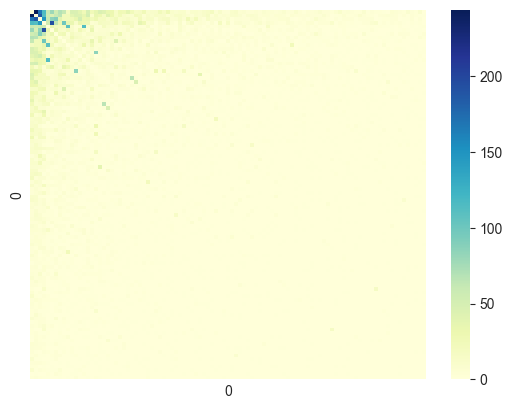

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data=[]
with open(r'.\需求挖掘过程\F词共现结果_100.txt','r',encoding='utf-8') as f:
    data = f.readlines()
#第一行为表头
data = pd.DataFrame([each.strip().split(',') for each in data])
data.columns = data.iloc[0,:]
data = data.iloc[1:,:]
data.index = data.iloc[:,0]
data = data.iloc[:,1:]
# 删除最后一列
data = data.iloc[:,:-1]
print(data)
# 边框线
sns.heatmap(data.astype(int),cmap='YlGnBu',linewidths=0,annot=False,fmt='d')
plt.xticks([])
plt.yticks([])